In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Se usa pandas para leer el archivo, se hace un dataframe para después convertir ese dataframe en una lista que se guarda en la variable "data"

In [ ]:
archivo = 'mnist_version_corta.csv'

df = pd.read_csv(archivo, header=None)
data = df.values.tolist()

print(f'El número de filas es: {len(data)}, mientras que el número de columnas es: {len(data[0])}')


El número de filas es: 10000, mientras que el número de columnas es: 785


In [ ]:
print(df.head(5))

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [ ]:
first_row = data[0]
first_label = int(first_row[0])

In [ ]:
first_image = [int(pixel) for pixel in first_row[1:]]
first_image = np.array(first_image, dtype=np.uint8)
print(first_image)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

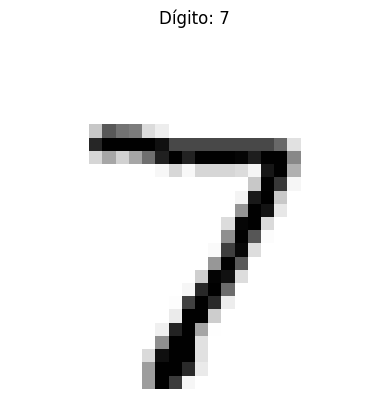

In [ ]:
def show_digit(image_vector, label):
    image_matrix = image_vector.reshape(28, 28)
    plt.imshow(image_matrix, cmap="Grays")
    plt.title(f"Dígito: {label}")
    plt.axis("off")
    plt.show()
show_digit(first_image, first_label)

In [ ]:
labels = []
pixels = []
for row in data:
    labels.append(int(row[0])) # numero de la imagen
    pixels.append([int(p) for p in row[1:]]) # píxeles como numeros

In [ ]:
nums = list(range(0,10))
for i in nums:
    print(f'- La cantidad de veces que aparece el número {i} es: {labels.count(i)}\n')

- La cantidad de veces que aparece el número 0 es: 980

- La cantidad de veces que aparece el número 1 es: 1135

- La cantidad de veces que aparece el número 2 es: 1032

- La cantidad de veces que aparece el número 3 es: 1010

- La cantidad de veces que aparece el número 4 es: 982

- La cantidad de veces que aparece el número 5 es: 892

- La cantidad de veces que aparece el número 6 es: 958

- La cantidad de veces que aparece el número 7 es: 1028

- La cantidad de veces que aparece el número 8 es: 974

- La cantidad de veces que aparece el número 9 es: 1009



In [ ]:
labels_array = np.array(labels)
pixels_array = np.array(pixels)
pixel_mean = np.mean(pixels_array) # Media
pixel_std = np.std(pixels_array) # Desviación estándar

print(f'La media de los pixels es: {pixel_mean}, mientras que la desviación estánndar de estos pixels es: {pixel_std}')

La media de los pixels es: 33.791224489795916, mientras que la desviación estánndar de estos pixels es: 79.17246322228644


In [ ]:
print("Primeras 5 etiquetas:", labels_array[:5])
print("Primeras 5 listas de píxeles:", pixels_array[:5])


Primeras 5 etiquetas: [7 2 1 0 4]
Primeras 5 listas de píxeles: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Proyecto de firma electrónica con imagenes blanco y negro**

Se va a definir la función "Trans_pixel" para que dependiendo del valor del pixel se transforme en un caracter con los valores que nos da el ejercicio. 

In [ ]:
def Transf_pixel(pixel):
    if 0 <= pixel < 64:
        return " "
    elif 64 <= pixel < 128:
        return "."
    elif 128 <= pixel < 192:
        return "*"
    else:
        return "#"

Ahora, con la función "Imagen_caracter" vamos a imprimir lo que se pide ocupando la función que antes definimos, pero hay varios detalles a tomar en cuenta para definir la función.

1. Como los valores de k que se tienen empiezan desde 1 hasta 10,000 lo que se hace primero es restar uno a ese valor de k para que coinida con el conteo de python que empieza desde el cero.

2. Aquí lo que se hace es que ocupamos la función definida antes para asignar el caracter según el valor del píxel y se guarda en una lista la cual ya tendrá todos los caracteres asignados según el valor del píxel.

3. Se imprime primero el dígito el cual se quiere formar.

4. En este ciclo se usa un método llamado "join()" que lo que hace es unir todos los elementos de la lista en un solo string por lo que al poner "".join(imegen) une los caracteres de la lista en la que guardamos los caracteres según el valor del pixel y el "" es lara agregarlos sin poner espacios.

5. Para la parte [i * 28:(i + 1) * 28] indicamos los elementos de la lista que queremos imprimir y dado que es una imagen de 28 píxels solo tomamos los primeros 28 elementos de nuestra lista y se imprimen, ya que para i=0 se tiene [0 * 28:(0 + 1) * 28] = [0 : 28], para i=1 [1 * 28:(1 + 1) * 28] = [28 : 56] y así sucesivamente. 

In [ ]:
def Imagen_caracter(k, pixels, labels):
    # 1.-
    valores = pixels[k - 1] 
    label = labels[k - 1]

    # 2.- 
    imagen = [Transf_pixel(pixel) for pixel in valores]

    # 3.-
    print(f"Dígito: {label}\n")
    for i in range(28):

        #4.- 
        print("".join(imagen[i * 28:(i + 1) * 28]))  # 5.-

# Se imprime el dígito 130 como dice el ejercicio.
Imagen_caracter(130, pixels_array, labels_array)


Dígito: 5

                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


Se sigue el análisis

Se define la función que cuenta los píxeles negros (cuto valor es mayor a 128) en cada posición de los 784 píxeles y se guardan los datos del conteo de los dígitos ceros y unos.

In [ ]:
def contar_pixeles_negros(conjunto, etiquetas, digito):
    valores = conjunto[etiquetas == digito]
    conteo_pixeles_negros = np.sum(valores > 128, axis=0)

    return conteo_pixeles_negros

# Calcular conteo de píxeles negros para los ceros y unos
conteo_ceros = contar_pixeles_negros(pixels_array, labels_array, 0)
conteo_unos = contar_pixeles_negros(pixels_array, labels_array, 1)


Se imprimen con el comando que nos dice el ejercicio en un mapa de calor.

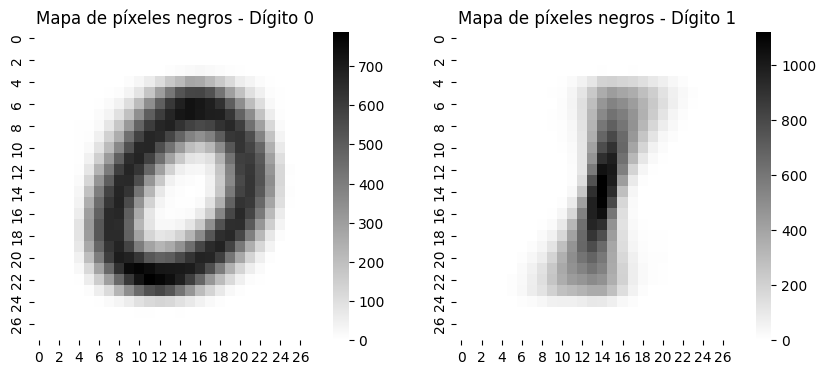

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conteo_ceros.reshape(28, 28), cmap="binary")
plt.title("Mapa de píxeles negros - Dígito 0")

plt.subplot(1, 2, 2)
sns.heatmap(conteo_unos.reshape(28, 28), cmap="binary")
plt.title("Mapa de píxeles negros - Dígito 1")

plt.show()

Para definir cuál es el i con el valor más alto representa el píxel que mejor separa los dígitos "0" y "1" es el siguiente código.

1. Se hace la operación que dice el ejercicio y se guarda en la variable "diferencia".

2. Se ocupa la función "np.argmax()" que nos dice donde se encuentra el índice del píxel con la mayor diferencia entre 0 y 1.

3. Como tenemos una lista de 784 elementos y nosotros tenemos una imagen de 28x28 se usa "divmod" que lo que hace es convertirnos nuestro vector de 1x784 en un array de 28x28 y se guardan como fila y columna para identificar el i que más difiere entre los dibujos del cero y uno.

In [ ]:
# 1.-
diferencia = np.abs(conteo_ceros - conteo_unos)
# 2.- 
i_max = np.argmax(diferencia)
# 3.-
fila, columna = divmod(i_max, 28)

print(f"El píxel más distintivo entre 0 y 1 está en la fila {fila}, columna {columna}.")


El píxel más distintivo entre 0 y 1 está en la fila 14, columna 14.
